In [5]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from matplotlib import cm
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [22]:
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
forcing=xr.open_dataset('NW2_forcing.nc', decode_times=False) #This is for the 1/8 degree case


# #1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

# #1/8 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

# #1/16 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
#                         'sub05/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
#av = xr.open_dataset('averages_00000902.nc', decode_times=False)  #20 5-day averages
av = xr.open_mfdataset(['averages_00000502.nc','averages_00000602.nc','averages_00000702.nc','averages_00000802.nc','averages_00000902.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
/glade/scratch/gmarques/NW2_TMP/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [23]:
#Read in various grid variables from the static file and forcing:
lon=fs['geolon']; lat=fs['geolat']
lonc=fs['geolon_c']; latc=fs['geolat_c']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
depth = fs['depth_ocean']
dxCu = fs['dxCu']; dyCv = fs['dyCv']; 
dx = (np.array(dxCu[:,:-1])+np.array(dxCu[:,1:]))*0.5
dy = (np.array(dyCv[1:,:])+np.array(dyCv[:-1,:]))*0.5

xh = fs.xh.values
yh = fs.yh.values
xq = fs.xq.values
yq = fs.yq.values

#taux= forcing.taux.values[0,:,:]; taux=(taux[:,1:]+taux[:,:-1])/2.
#taux.shape

## Plotting the topography and zonal wind forcing:

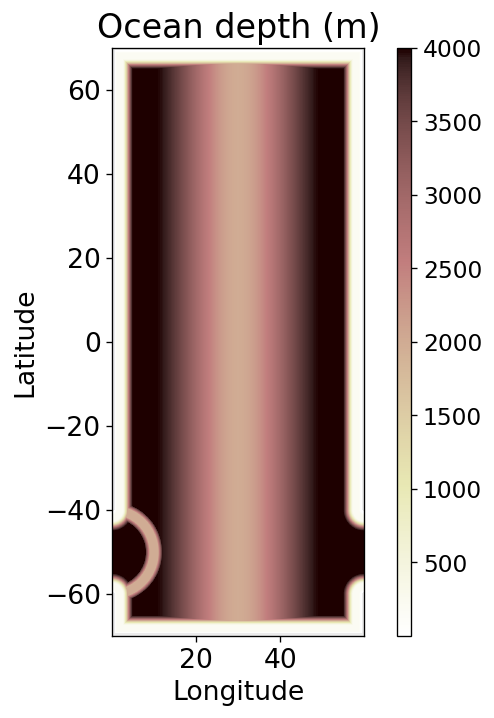

In [8]:
#Plotting ocean depth
fig = plt.figure(figsize=(4, 7), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Ocean depth (m)',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,depth,cmap=cm.pink_r)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

### Plotting the zonal transects (density, $d\rho /dz$, u and v velocities) as 500-day averaged quantities (averaging over all 100 snapshots from the averages file):

In [25]:
#FOR ZONAL TRANSECTS AVERAGED IN TIME:
index=640 #80 (50S), 180, 280, 460 for 1/4 degree
Layer = np.array(os['Layer']);
Layermat=np.tile(Layer,[len(xh),1]); Layermat=np.moveaxis(Layermat, [0, 1], [1, 0])
Interface = np.array(os['Interface']); drho=np.diff(Interface)
drhomat=np.tile(drho,[len(xh),1]);     drhomat =np.moveaxis(drhomat, [0, 1], [1,0])

u = np.nanmean(np.array(av['u'][:,:,index,:]),axis=0);
v = np.nanmean(np.array(av['v'][:,:,index,:]),axis=0); v=(v[:,:-1]+v[:,1:])/2
h = np.nanmean(np.array(av['h'][:,:,index,:]),axis=0); u=(u[:,:-1]+u[:,1:])/2
eta = np.zeros((len(Layer)+1,len(xh)));

for i in range(1,len(Layer)+1):
    eta[i,:]=np.nansum(h[0:i,:],axis=0)
#To make sure eta is correct: #print(eta[:,50,50]) #print(h[:,50,50])  

drhodz=drhomat/h 
eta.shape
u.shape

(15, 1920)

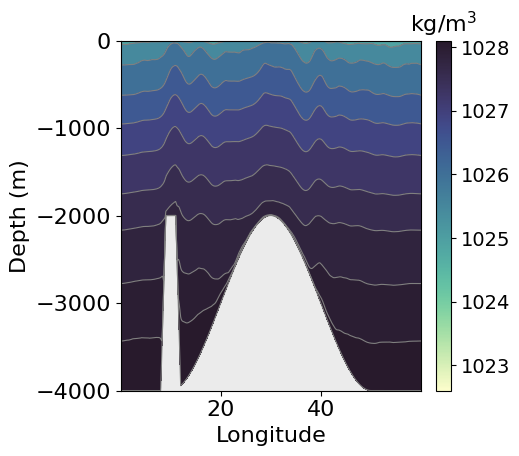

In [26]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.set_title('kg/m$^3$',fontsize=16);
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,np.array(Layermat),cmap=cmocean.cm.deep)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()
#fig.savefig('density_transect.png')

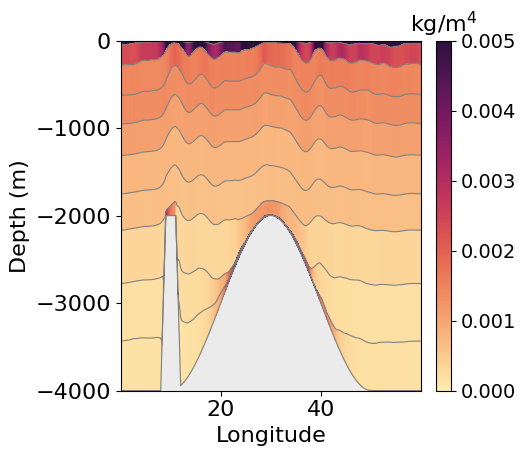

In [27]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16);
ax2.set_title('kg/m$^4$',fontsize=16);
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,(drhodz),cmap=cmocean.cm.matter,vmin=0,vmax=.5e-2)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average
plt.show()
#fig.savefig('drhodz_transect.png')

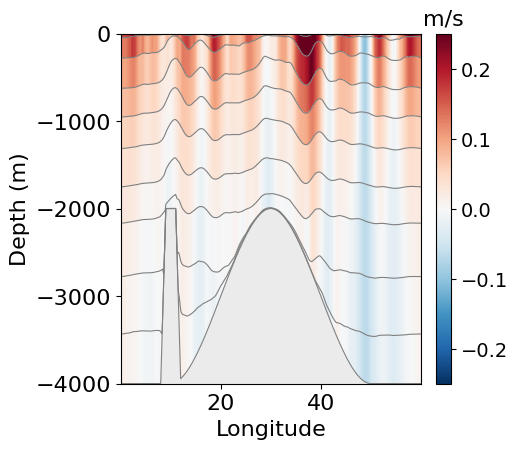

In [28]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.set_title('m/s',fontsize=16); 
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,u,cmap='RdBu_r',vmin=-0.25,vmax=0.25)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()
#fig.savefig('u_velocity_transect.png')

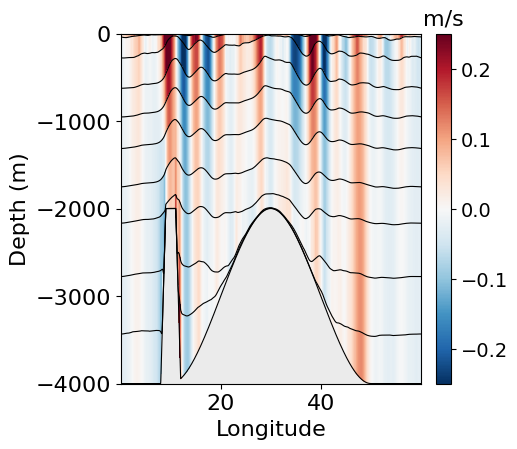

In [30]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
#ax1.set_yticklabels('')
ax1.tick_params(labelsize=16); 
ax2.set_title('m/s',fontsize=16); 
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,v,cmap='RdBu_r',vmin=-0.25,vmax=0.25)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color='k',linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()
#fig.savefig('v_velocity_transect.png')

In [103]:
#FOR ZONAL TRANSECTS UNAVERAGED:
index=40 #80 (50S), 180, 280, 460 for 1/4 degree
Layer = np.array(os['Layer']);
Layermat=np.tile(Layer,[len(xh),1]); Layermat=np.moveaxis(Layermat, [0, 1], [1, 0])
Interface = np.array(os['Interface']); drho=np.diff(Interface)
drhomat=np.tile(drho,[len(xh),1]);     drhomat =np.moveaxis(drhomat, [0, 1], [1,0])

u = np.array(av['u'][-1,:,index,:]);
v = np.array(av['v'][-1,:,index,:]); v=(v[:,:-1]+v[:,1:])/2
h = np.array(av['h'][-1,:,index,:]); u=(u[:,:-1]+u[:,1:])/2
eta = np.zeros((len(Layer)+1,len(xh)));

for i in range(1,len(Layer)+1):
    eta[i,:]=np.nansum(h[0:i,:],axis=0)
#To make sure eta is correct: #print(eta[:,50,50]) #print(h[:,50,50])  

drhodz=drhomat/h 
eta.shape
u.shape

(15, 120)

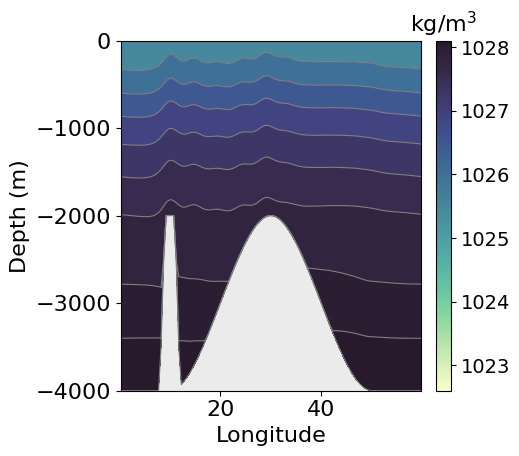

In [104]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.set_title('kg/m$^3$',fontsize=16);
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,np.array(Layermat),cmap=cmocean.cm.deep)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()
#fig.savefig('density_transect.png')

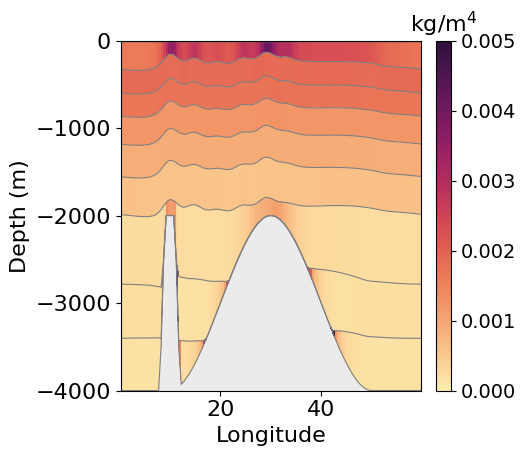

In [106]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
ax1.tick_params(labelsize=16);
ax2.set_title('kg/m$^4$',fontsize=16);
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,(drhodz),cmap=cmocean.cm.matter,vmin=0,vmax=.5e-2)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color=[.5,.5,.5],linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average
plt.show()
#fig.savefig('drhodz_transect.png')

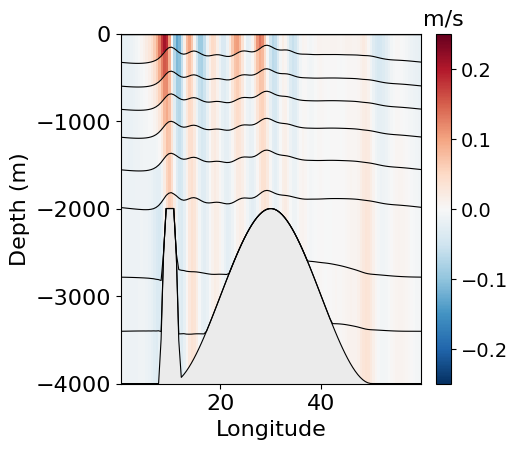

In [107]:
fig = plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Depth (m)',fontsize=16)
#ax1.set_yticklabels('')
ax1.tick_params(labelsize=16); 
ax2.set_title('m/s',fontsize=16); 
ax2.tick_params(labelsize=14)
ax1.set_ylim([-4000,0])

plotted =ax1.pcolor(xh,-eta,v,cmap='RdBu_r',vmin=-0.25,vmax=0.25)
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
for i in range(1,len(Layer)+1,1):
    line,=ax1.plot(xh,-eta[i,:],color='k',linewidth=.8) #Plot the individual layer positions, don't do this for alongshore average

plt.show()
#fig.savefig('v_velocity_transect.png')